### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
trans_data = pd.read_excel(r'dados proj.xlsx')
trans_data.set_index('transaction_id',inplace=True)
trans_data.sort_values('cust_id')

,cust_id,tran_date,DOB,Kidhome,Nationality,Gender,Address,Channel,Type_payment,Product line,Unit price,Quantity,Tax,Total_amt,cogs,Rating
transaction_id,,,,,,,,,,,,,,,,
17155024961,266783,2019-01-09,2979-04-05 00:00:00,0.0,NaN,M,Faro,Online,MBWay,Fashion accessories,18.08,4,3.616,75.936,72.32,9.5
8565789170,266783,2019-01-20,2979-04-05 00:00:00,1.0,NaN,M,Faro,Online,MBWay,Health and beauty,14.62,5,3.655,76.755,73.10,4.4
8565789170,266783,2019-01-20,2979-04-05 00:00:00,1.0,NaN,M,Faro,Online,MBWay,Electronic accessories,73.26,1,3.663,76.923,73.26,9.7
8565789170,266783,2019-01-20,2979-04-05 00:00:00,1.0,NaN,M,Faro,Online,MBWay,Sports and travel,14.70,5,3.675,77.175,73.50,8.5
8565789170,266783,2019-01-20,2979-04-05 00:00:00,1.0,NaN,M,Faro,Online,MBWay,Fashion accessories,73.96,1,3.698,77.658,73.96,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29201449542,275252,2019-04-24,1982-02-11 00:00:00,1.0,NaN,M,Lisbon,Store,Credit Card,Sports and travel,97.48,9,43.866,921.186,877.32,7.4
65574855452,275252,2019-11-23,1982-02-11 00:00:00,1.0,NaN,M,Lisbon,Catalog,MBWay,Sports and travel,97.48,9,43.866,921.186,877.32,7.4
65574855452,275252,2019-11-23,1982-02-11 00:00:00,1.0,NaN,M,Lisbon,Catalog,MBWay,Sports and travel,97.48,9,43.866,921.186,877.32,NaN


In [3]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 99532532450 to 627826147
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cust_id       5000 non-null   int64         
 1   tran_date     5000 non-null   datetime64[ns]
 2   DOB           5000 non-null   object        
 3   Kidhome       4984 non-null   float64       
 4   Nationality   174 non-null    object        
 5   Gender        5000 non-null   object        
 6   Address       5000 non-null   object        
 7   Channel       5000 non-null   object        
 8   Type_payment  5000 non-null   object        
 9   Product line  5000 non-null   object        
 10  Unit price    5000 non-null   float64       
 11  Quantity      5000 non-null   int64         
 12  Tax           5000 non-null   float64       
 13  Total_amt     4981 non-null   float64       
 14  cogs          5000 non-null   float64       
 15  Rating        4968 non-

### Transaction Table: Descriptive Statistics

By looking at the descriptive statistics table its possible to see that in general the data looks goods, however we have some problems in a few variables (cogs and rating) since they present incoherent values. Cogs has a minimum value of -99 which is impossible since cogs has to be greater than 0 and Ratings have values greater than 10 which is also impossible since the maximum rating is 10.

In [4]:
trans_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,5000.0,271001.232400,2409.033580,266783.0000,268895.0000,271045.0000,273094.0000,275252.00
Kidhome,4984.0,0.721308,0.448401,0.0000,0.0000,1.0000,1.0000,1.00
Unit price,5000.0,69.963190,30.334670,10.1700,43.1900,83.2950,96.1225,99.96
Quantity,5000.0,5.892600,3.004475,1.0000,3.0000,6.0000,9.0000,10.00
Tax,5000.0,20.984337,14.880718,0.5085,7.4065,16.0720,34.8700,49.65
Total_amt,4981.0,441.158714,312.445226,10.6785,156.0300,338.2155,733.6035,1042.65
cogs,5000.0,418.101940,298.380537,-99.0000,145.5000,320.2150,696.8500,993.00
Rating,4968.0,15.394082,284.165457,4.0000,5.5000,6.8000,8.3000,10000.00


In [5]:
trans_data.describe(include=np.object0).T

,count,unique,top,freq
DOB,5000,758,1997-03-31 00:00:00,26
Nationality,174,4,PT,153
Gender,5000,2,M,2761
Address,5000,5,Lisbon,3028
Channel,5000,3,Online,3339
Type_payment,5000,4,MBWay,3808
Product line,5000,6,Sports and travel,890


In [6]:
trans_data.isnull().sum()

cust_id            0
tran_date          0
DOB                0
Kidhome           16
Nationality     4826
Gender             0
Address            0
Channel            0
Type_payment       0
Product line       0
Unit price         0
Quantity           0
Tax                0
Total_amt         19
cogs               0
Rating            32
dtype: int64

- Calculating the number of customers in the transaction table

In [7]:
cust_len = len(set(trans_data.loc[:,'cust_id']))
print(f'There are {cust_len} customers in the transaction table')

There are 801 customers in the transaction table


General information about the data

### Treating Outliers

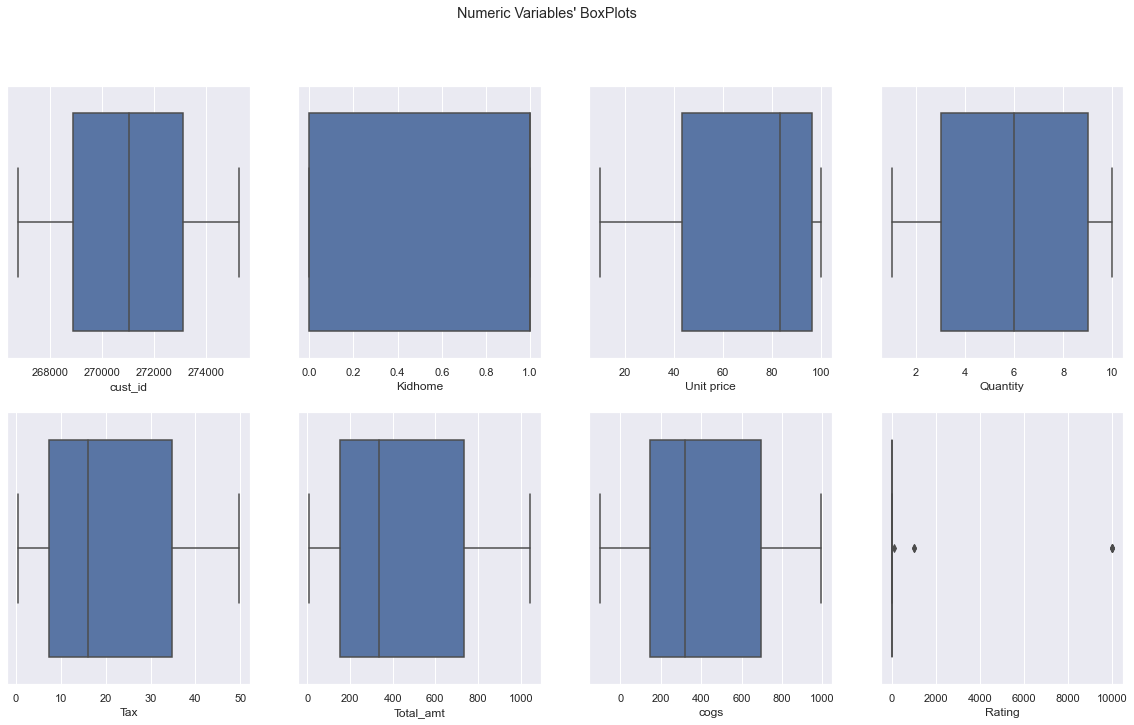

In [8]:
def boxplot (data):
    from math import ceil

    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
  
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.boxplot(data[feat], ax = ax)
        #plt.title(feat)


    title = "Numeric Variables' BoxPlots"

    plt.suptitle(title)

    plt.show()
boxplot(trans_data)
#outliers in ratings


7 outliers were removed
The dataset currently has 4993 observations


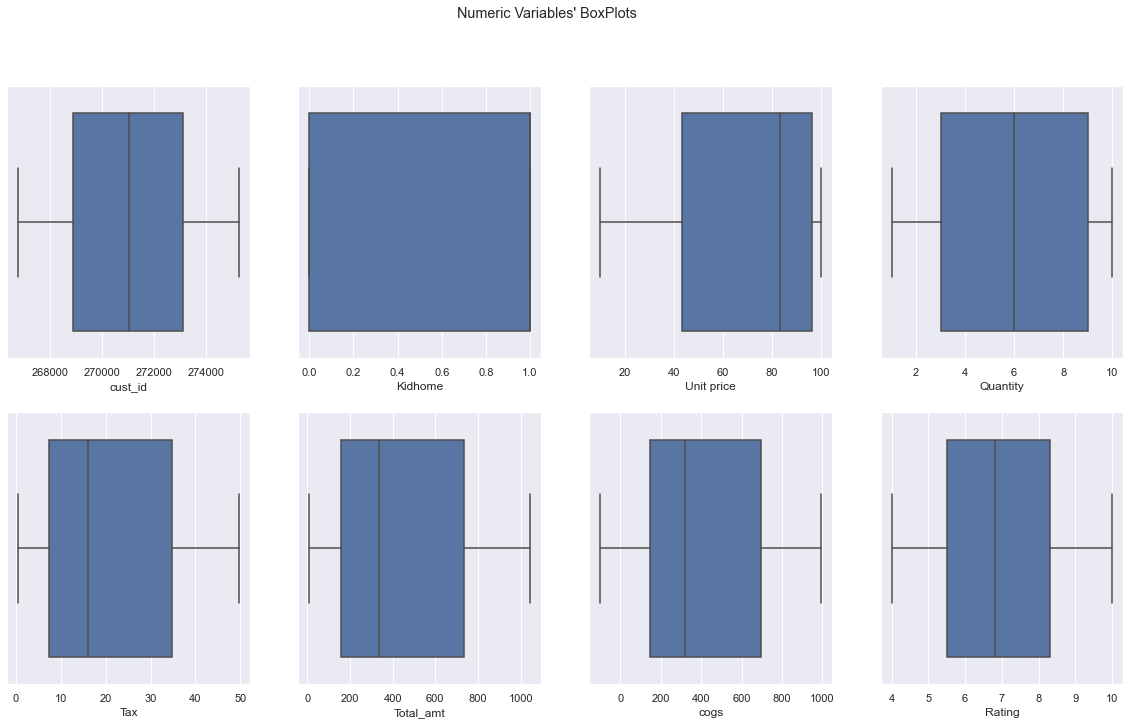

In [9]:
init_len = len(trans_data)
trans_data = trans_data.loc[(trans_data['Rating']<=10) & (trans_data['Rating']>=0) | 
                            (trans_data['Rating'].index.isin(trans_data.loc[trans_data['Rating'].isnull()].index))]
#the goal is to keep the missing values
print(f'{init_len-len(trans_data)} outliers were removed')
print(f'The dataset currently has {trans_data.shape[0]} observations')
boxplot(trans_data)

### Treating missing values

In [10]:
trans_data.isnull().sum()

cust_id            0
tran_date          0
DOB                0
Kidhome           16
Nationality     4819
Gender             0
Address            0
Channel            0
Type_payment       0
Product line       0
Unit price         0
Quantity           0
Tax                0
Total_amt         19
cogs               0
Rating            32
dtype: int64

In [11]:
trans_data['Kidhome'].value_counts() #fill missing values with the mode

1.0    3590
0.0    1387
Name: Kidhome, dtype: int64

In [12]:
trans_data['Total_amt'] = trans_data['cogs'] + trans_data['Tax']
trans_data['Kidhome'] = trans_data['Kidhome'].fillna(value= trans_data['Kidhome'].mode()[0])
metric_features = list(trans_data.select_dtypes(include=np.number).set_index(trans_data.index).columns)
cat_features = list(trans_data.select_dtypes(exclude=np.number).set_index(trans_data.index).columns)

In [13]:
trans_data.isnull().sum()

cust_id            0
tran_date          0
DOB                0
Kidhome            0
Nationality     4819
Gender             0
Address            0
Channel            0
Type_payment       0
Product line       0
Unit price         0
Quantity           0
Tax                0
Total_amt          0
cogs               0
Rating            32
dtype: int64

In [14]:
trans_metric = trans_data.loc[:,metric_features]
trans_cat = trans_data.loc[:,cat_features]

In [15]:
def knn_imput (data):
    from sklearn.impute import KNNImputer
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')
    imputer.fit(data)
    transform = imputer.transform(data)
    x = pd.DataFrame(transform, columns = data.columns, index = data.index)
    
    return(x)

trans_metric = knn_imput(trans_metric)


In [16]:
trans_cat.isnull().sum()

tran_date          0
DOB                0
Nationality     4819
Gender             0
Address            0
Channel            0
Type_payment       0
Product line       0
dtype: int64

In [17]:
trans_cat['Nationality'].value_counts()

PT    153
EN     12
ES      7
FR      2
Name: Nationality, dtype: int64

In [18]:
trans_cat['Nationality'].fillna(trans_cat['Nationality'].mode().values[0],inplace=True)
#fill missing values with the mode 

In [19]:
trans_data = pd.concat([trans_metric, trans_cat],axis=1) #merging the 2 datasets back together

In [20]:
trans_data.isnull().sum()

cust_id         0
Kidhome         0
Unit price      0
Quantity        0
Tax             0
Total_amt       0
cogs            0
Rating          0
tran_date       0
DOB             0
Nationality     0
Gender          0
Address         0
Channel         0
Type_payment    0
Product line    0
dtype: int64

### Treating incoherences

__Incoherence 1:__
- __Transaction Date < Date of Birth__ (no one can buy without being born)
- __Total_amt < 0__ (A client can't pay negative values to a company) - this incoherence takes cares of Tax and Cogs (the query to remove the incoherence was performed using Cogs) 

In [21]:
init_len = len(trans_data)
incoherence1 = trans_data.loc[trans_data['tran_date']<trans_data['DOB']].copy()
incoherence2 = trans_data.loc[trans_data['cogs']<0]
trans_data = trans_data.loc[trans_data['tran_date']>trans_data['DOB']]
trans_data = trans_data.loc[trans_data['cogs']>0]
after_len = len(trans_data)
print(f'We are going to remove {init_len-after_len} observations')
print(len(trans_data))
#incoherence where the date of the transaction is higher then the date of birth of the customer 

We are going to remove 28 observations
4965


Testing incoherence 1

In [22]:
trans_data.loc[pd.to_datetime(trans_data['tran_date'])<trans_data['DOB']]
#no more incoherences regarding dates

,cust_id,Kidhome,Unit price,Quantity,Tax,Total_amt,cogs,Rating,tran_date,DOB,Nationality,Gender,Address,Channel,Type_payment,Product line
transaction_id,,,,,,,,,,,,,,,,


Testing incoherence 2

In [23]:
trans_data.loc[trans_data['cogs']<0]

,cust_id,Kidhome,Unit price,Quantity,Tax,Total_amt,cogs,Rating,tran_date,DOB,Nationality,Gender,Address,Channel,Type_payment,Product line
transaction_id,,,,,,,,,,,,,,,,


In [24]:
len2 = len(set(trans_data['cust_id']))
print(f'{len2} customers remained after the Pre-Processing stage.')

800 customers remained after the Pre-Processing stage.


### Creating the signature

In [25]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 99532532450 to 627826147
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cust_id       4965 non-null   float64       
 1   Kidhome       4965 non-null   float64       
 2   Unit price    4965 non-null   float64       
 3   Quantity      4965 non-null   float64       
 4   Tax           4965 non-null   float64       
 5   Total_amt     4965 non-null   float64       
 6   cogs          4965 non-null   float64       
 7   Rating        4965 non-null   float64       
 8   tran_date     4965 non-null   datetime64[ns]
 9   DOB           4965 non-null   object        
 10  Nationality   4965 non-null   object        
 11  Gender        4965 non-null   object        
 12  Address       4965 non-null   object        
 13  Channel       4965 non-null   object        
 14  Type_payment  4965 non-null   object        
 15  Product line  4965 non-

In [26]:
by_pivot = {}  #creating a dict to fill with values 
for index , i in enumerate(['Channel', 'Product line', 'Type_payment']):
    by_pivot[i] = pd.DataFrame #create a df inside the dict 
    by_i = (trans_data.groupby(['cust_id', i]).sum()['Total_amt']).reset_index() 
    #by_i.T.reset_index(drop=True).T
    #grouping the variables in question by cust_id taking into account tot amount
    by_pivot[i] = pd.pivot(by_i, index = ('cust_id'),columns=[i])
    
#this could also be done using Cogs which wuld produce similar results

In [27]:
channel = ((by_pivot['Channel'])['Total_amt'].copy()).fillna(value=0)
prod_line = ((by_pivot['Product line'])['Total_amt'].copy()).fillna(value=0)
tp_payment = ((by_pivot['Type_payment'])['Total_amt'].copy()).fillna(value=0)

#filling the missing values with 0 because they are actualluy 0 since the client doesn't 
#have any amount on certain variables

In [28]:
channel.loc[(channel['Store']> channel['Online']) & (channel['Store']> channel['Catalog']),'Fav_channel'] = 'Store'
channel.loc[(channel['Online']> channel['Store']) & (channel['Online']> channel['Catalog']),'Fav_channel'] = 'Online'
channel.loc[(channel['Catalog']> channel['Store']) & (channel['Catalog']> channel['Online']),'Fav_channel'] = 'Catalog'
channel['Fav_channel'].fillna(value='Mixed',inplace=True)


In [29]:
423.87 +977.8

1401.67

In [30]:
channel.head(5)

Channel,Catalog,Online,Store,Fav_channel
cust_id,,,,
266799.0,0.000,423.8745,977.8020,Store
266806.0,0.000,238.5180,458.6925,Store
266814.0,0.000,38.3880,76.9335,Store
266819.0,0.000,196.0560,634.4940,Store
266827.0,690.018,0.0000,1380.0360,Store


In [31]:
#the loops are performing the operations shown in the cell above
for i in (prod_line.columns):
    col = np.array(prod_line.columns)
    col = col[col!=i]
    prod_line.loc[(prod_line[f'{i}']>prod_line[col[0]]) & (prod_line[f'{i}']>prod_line[col[1]]) & 
                  (prod_line[f'{i}']>prod_line[col[3]]) & (prod_line[f'{i}']>prod_line[col[4]]), 'Fav_prod_line'] = i
    
prod_line['Fav_prod_line'].fillna(value='Mixed', inplace=True)
prod_line.reset_index(inplace=True)


In [32]:
prod_line.head(5)

Product line,cust_id,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Fav_prod_line
0,266799.0,0.000,228.1965,0.0000,0.0000,782.208,391.272,Home and lifestyle
1,266806.0,315.441,75.9360,152.9325,152.9010,0.000,0.000,Electronic accessories
2,266814.0,0.000,0.0000,0.0000,57.7395,57.582,0.000,Health and beauty
3,266819.0,0.000,0.0000,196.0560,0.0000,489.090,145.404,Home and lifestyle
4,266827.0,2070.054,0.0000,0.0000,0.0000,0.000,0.000,Electronic accessories


In [33]:
for i in tp_payment.columns:
    col = np.array(tp_payment.columns)
    col = col[col!=i]
    tp_payment.loc[(tp_payment[i]>tp_payment[col[0]]) & (tp_payment[i]>tp_payment[col[1]]) &(tp_payment[i]>tp_payment[col[2]]), 'Fav_Payment_Method'] = i

tp_payment['Fav_Payment_Method'].fillna(value='Mixed',inplace=True)

In [34]:
tp_payment

Type_payment,Cash,Credit Card,MBWay,Paypal,Fav_Payment_Method
cust_id,,,,,
266799.0,0.0,977.8020,423.8745,0.0,Credit Card
266806.0,0.0,458.6925,238.5180,0.0,Credit Card
266814.0,0.0,76.9335,38.3880,0.0,Credit Card
266819.0,0.0,634.4940,196.0560,0.0,Credit Card
266827.0,0.0,1380.0360,690.0180,0.0,Credit Card
...,...,...,...,...,...
275230.0,0.0,0.0000,1826.3385,0.0,MBWay
275233.0,0.0,2984.5410,7357.0875,0.0,MBWay
275246.0,0.0,1543.8150,1536.1290,0.0,Credit Card


In [35]:
tp_payment.head(5)

Type_payment,Cash,Credit Card,MBWay,Paypal,Fav_Payment_Method
cust_id,,,,,
266799.0,0.0,977.8020,423.8745,0.0,Credit Card
266806.0,0.0,458.6925,238.5180,0.0,Credit Card
266814.0,0.0,76.9335,38.3880,0.0,Credit Card
266819.0,0.0,634.4940,196.0560,0.0,Credit Card
266827.0,0.0,1380.0360,690.0180,0.0,Credit Card


In [36]:
avg_rate = trans_data.groupby('cust_id').mean()['Rating']

In [37]:
trans_data.groupby(['cust_id','transaction_id']).sum()['Total_amt']

cust_id   transaction_id
266799.0  26894882231        423.8745
          84627191878        977.8020
266806.0  14296571232        458.6925
          71183714242        238.5180
266814.0  13808024915         38.3880
                              ...    
275250.0  82662118191       2151.0720
          88737401370       2061.8745
275252.0  29201449542       1842.3720
          65574855452       1842.3720
          84784155619        921.1860
Name: Total_amt, Length: 1831, dtype: float64

In [38]:
avg_expense = trans_data.groupby(['cust_id','transaction_id']).sum()['Total_amt'].groupby('cust_id').mean()
avg_expense

cust_id
266799.0     700.838250
266806.0     348.605250
266814.0      57.660750
266819.0     415.275000
266827.0    1035.027000
               ...     
275230.0     913.169250
275233.0    5170.814250
275246.0    1539.972000
275250.0    1434.171375
275252.0    1535.310000
Name: Total_amt, Length: 800, dtype: float64

In [39]:
frequency = (trans_data.groupby(['cust_id','transaction_id']).count()['DOB'].reset_index()).drop('DOB',axis=1).groupby('cust_id').count()
frequency.rename(columns={'transaction_id':'frequency'},inplace=True)
frequency.head(5)

,frequency
cust_id,
266799.0,2
266806.0,2
266814.0,2
266819.0,2
266827.0,2


In [40]:
#treating the DOB variable before calculating age (including incoherences where DOB> today) 
trans_data['DOB'] = trans_data['DOB'].astype('str')
trans_data['YOB'] = trans_data['DOB'].str[:4].astype('int') 
trans_data = trans_data.loc[trans_data['DOB'] < '2021-10-21 00:00:00']
trans_data['DOB'] = pd.to_datetime(trans_data['DOB'])


In [41]:
gen_info = trans_data.loc[:,['cust_id','Nationality','YOB', 'DOB', 'Gender','Address','Kidhome']].groupby('cust_id').head(1)
(gen_info.reset_index(drop=True))
gen_info.set_index('cust_id',inplace=True)
gen_info['Age'] = date.today().year - gen_info['YOB']
gen_info.head(5)

,Nationality,YOB,DOB,Gender,Address,Kidhome,Age
cust_id,,,,,,,
269716.0,PT,1996,1996-06-09,M,Braga,0.0,25
268148.0,PT,1983,1983-11-25,M,Braga,1.0,38
272883.0,PT,1975,1975-01-24,M,Braga,1.0,46
272590.0,PT,1980,1980-02-25,M,Braga,1.0,41
273913.0,PT,1985,1985-03-01,M,Braga,1.0,36


In [42]:
signature = gen_info
for i in [frequency, avg_rate, avg_expense, channel, prod_line, tp_payment]:
    signature = pd.merge(signature, i, on = 'cust_id')

signature.set_index('cust_id',inplace=True)
signature.rename(columns={'Total_amt':'Average_expense'},inplace=True)

signature['Tot_Amount'] = trans_data.groupby('cust_id').sum()['Total_amt']

signature.head(5)

,Nationality,YOB,DOB,Gender,Address,Kidhome,Age,frequency,Rating,Average_expense,...,Health and beauty,Home and lifestyle,Sports and travel,Fav_prod_line,Cash,Credit Card,MBWay,Paypal,Fav_Payment_Method,Tot_Amount
cust_id,,,,,,,,,,,,,,,,,,,,,
269716.0,PT,1996,1996-06-09,M,Braga,0.0,25,4,7.393333,990.62775,...,432.978,598.731,759.5910,Electronic accessories,0.0,0.0000,3962.5110,0.0,MBWay,3962.5110
268148.0,PT,1983,1983-11-25,M,Braga,1.0,38,2,4.700000,1488.93150,...,0.000,745.836,742.8120,Home and lifestyle,0.0,0.0000,2977.8630,0.0,MBWay,2977.8630
272883.0,PT,1975,1975-01-24,M,Braga,1.0,46,2,7.071429,1623.16875,...,628.173,314.055,0.0000,Food and beverages,0.0,3036.5685,209.7690,0.0,Credit Card,3246.3375
272590.0,PT,1980,1980-02-25,M,Braga,1.0,41,2,7.640000,196.46025,...,0.000,14.679,104.7165,Fashion accessories,0.0,0.0000,392.9205,0.0,MBWay,392.9205
273913.0,PT,1985,1985-03-01,M,Braga,1.0,36,4,7.066667,636.21600,...,0.000,0.000,0.0000,Fashion accessories,0.0,0.0000,2544.8640,0.0,MBWay,2544.8640


In [43]:
signature.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 800 entries, 269716.0 to 270578.0
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Nationality             800 non-null    object        
 1   YOB                     800 non-null    int32         
 2   DOB                     800 non-null    datetime64[ns]
 3   Gender                  800 non-null    object        
 4   Address                 800 non-null    object        
 5   Kidhome                 800 non-null    float64       
 6   Age                     800 non-null    int32         
 7   frequency               800 non-null    int64         
 8   Rating                  800 non-null    float64       
 9   Average_expense         800 non-null    float64       
 10  Catalog                 800 non-null    float64       
 11  Online                  800 non-null    float64       
 12  Store                   800 non-null

### Test to check results

In [44]:
np.round(trans_data.groupby('Channel')['Total_amt'].sum(),4)

Channel
Catalog    2.569365e+05
Online     1.457433e+06
Store      4.760396e+05
Name: Total_amt, dtype: float64

In [45]:
np.round(signature[['Catalog','Online','Store']].sum(),4)

Catalog    2.569365e+05
Online     1.457433e+06
Store      4.760396e+05
dtype: float64

In [46]:
for i in ['Product line','Type_payment','Channel']:
    print(f'Testing {i} section:')
    print(' ')
    print('Transaction Table:')
    print(np.round(trans_data.groupby(f'{i}')['Total_amt'].sum(),4))
    print('')
    print('Customer signature Table:')
    print(np.round(signature.loc[:,trans_data.groupby(f'{i}')['Total_amt'].sum().index.values].sum(),4))
    print('-'*125)

Testing Product line section:
 
Transaction Table:
Product line
Electronic accessories    388603.3830
Fashion accessories       366314.9070
Food and beverages        351783.8205
Health and beauty         243916.4910
Home and lifestyle        421011.8430
Sports and travel         418778.2935
Name: Total_amt, dtype: float64

Customer signature Table:
Electronic accessories    388603.3830
Fashion accessories       366314.9070
Food and beverages        351783.8205
Health and beauty         243916.4910
Home and lifestyle        421011.8430
Sports and travel         418778.2935
dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Testing Type_payment section:
 
Transaction Table:
Type_payment
Cash           2.471899e+03
Credit Card    4.831316e+05
MBWay          1.680954e+06
Paypal         2.385129e+04
Name: Total_amt, dtype: float64

Customer signature Table:
Cash           2.471899e+03
Credit Card    4.

### Decriptive Statistics: Signature

By looking at the descriptive statistics 

In [47]:
signature.describe().T

,count,mean,std,min,25%,50%,75%,max
YOB,800.0,1985.111250,6.857854,1974.0000,1980.000000,1984.000000,1992.000000,1997.00000
Kidhome,800.0,0.710000,0.454046,0.0000,0.000000,1.000000,1.000000,1.00000
Age,800.0,35.888750,6.857854,24.0000,29.000000,37.000000,41.000000,47.00000
frequency,800.0,2.288750,0.702489,1.0000,2.000000,2.000000,3.000000,6.00000
Rating,800.0,6.916597,1.083332,4.0000,6.238333,6.883333,7.563542,9.90000
Average_expense,800.0,1210.277611,991.673723,10.6785,466.268250,960.295000,1713.159525,6801.18075
Catalog,800.0,321.170614,611.289008,0.0000,0.000000,0.000000,393.372000,4712.24250
Online,800.0,1821.790858,2048.742379,0.0000,362.383875,1192.947000,2632.966875,13602.36150
Store,800.0,595.049451,1127.522693,0.0000,0.000000,0.000000,727.823250,8673.38850
Electronic accessories,800.0,485.754229,920.335881,0.0000,0.000000,0.000000,658.056000,7539.58800


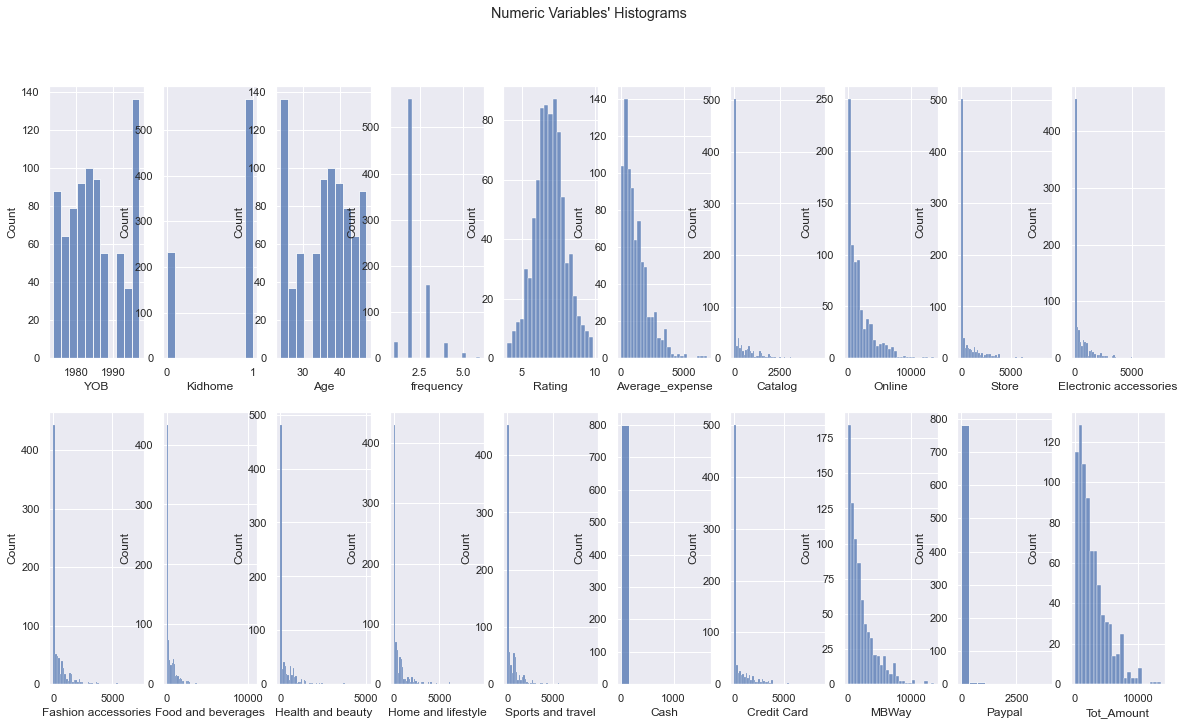

In [48]:
def histogram(data):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
    for ax, feat in zip(axes.flatten(), metric_features):

        sns.histplot(data[feat], ax = ax)
        #plt.title(feat)

    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
histogram(signature)

### Some visualizations to get to know better the data

### Insights extracted from the transactional table

Total Amount grouped by Month without taking into consideration the years.
By looking at the graphic its possible to obseverve that by far december is most lucrative month for the company, this can be considered normal since it's the month where people tend to buy more things and spend more money.

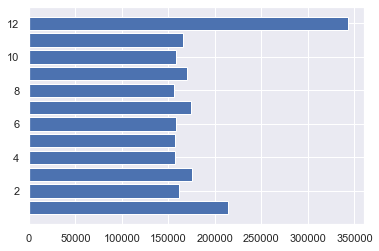

In [49]:
def groupbyMonth (data):
    data1 = data.copy()
    data.loc[:,'month'] = pd.DatetimeIndex((trans_data['tran_date'].astype(str))).month
    data.loc[:,'year'] = pd.DatetimeIndex((trans_data['tran_date'].astype(str))).year
    plot_data = data.groupby(['month']).sum()['Total_amt']
    plt.figure()
    plt.barh(width=plot_data.values, y =plot_data.index )
    plt.show()
groupbyMonth(trans_data)

Total amount grouped by both months and years. For the years 2018 and 2020 the results aren't that interesting due to lack of data from most months, In 2018 we only have data for November and December and for 2020 we only have data for January.
The results from 2019 (the only year with complete data) are similar to the results shown above with December being the most lucrative month for the company followed by March (3), July (7) and Semptember (9). The differences between December and the other months is much smaller in the 2019 graphic when compared to the graphic shown above because in the graphic above we are also taking into consideration the sales of 2018 that has high value of sales in December.

2018
There is data for 2 months in 2018
The number of the month with highest sales in 2018 is 12


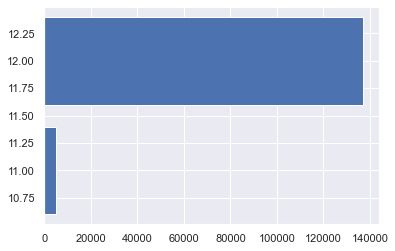

2019
There is data for 12 months in 2019
The number of the month with highest sales in 2019 is 12


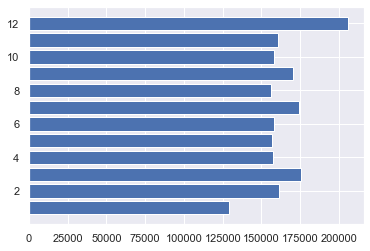

2020
There is data for 1 months in 2020
The number of the month with highest sales in 2020 is 1


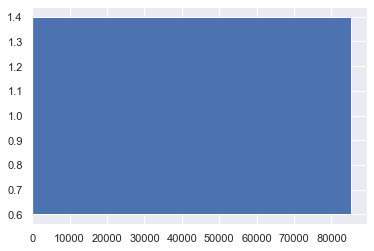

In [50]:
def groupbyMonth_year (data):
    data1 = data.copy()
    data.loc[:,'month'] = pd.DatetimeIndex((trans_data['tran_date'].astype(str))).month
    data.loc[:,'year'] = pd.DatetimeIndex((trans_data['tran_date'].astype(str))).year
    for i in [2018,2019,2020]:
        print(i)
        plot_data = data.loc[data['year']==i].groupby(['month']).sum()['Total_amt']
        print(f'There is data for {len(plot_data.index)} months in {i}')
        print(f'The number of the month with highest sales in {i} is {plot_data.loc[plot_data.values == plot_data.max()].index[0]}')
        plt.figure()
        plt.barh(width=plot_data.values, y =np.round(plot_data.index,1 ))
        plt.show()
groupbyMonth_year(trans_data)

The graphics below calculate the total amount of money received by the company taking into consideration the different sectors that the company presents (Product Line, Type of payment and Channel).  
Regarding the Product Line, the most popular categories among customers (categories where customers spend most money) are the 'Sports and Travel' and 'Home and Lifestyle' and the least popular category, by far, is Health and Beauty. When looking at payment methods, it's easy to see that the most lucrative payment method for the company is by far MBWay and regarding channels it's possible to see that the majority of the customers buys online making it the most lucrstive channel that the company has.

Product line


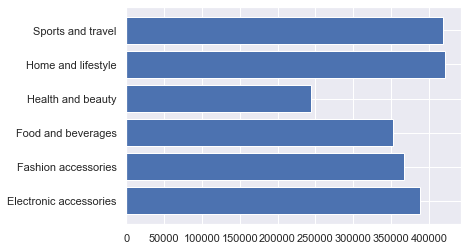

-----------------------------------------------------------------------------------------------------------------------------
Type_payment


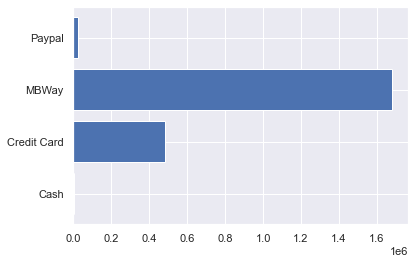

-----------------------------------------------------------------------------------------------------------------------------
Channel


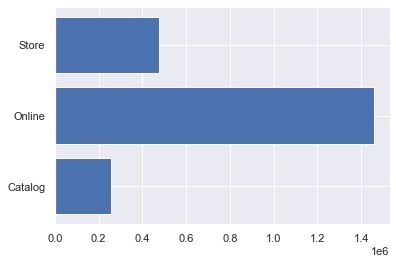

-----------------------------------------------------------------------------------------------------------------------------


In [51]:
for index , i in enumerate(['Product line','Type_payment','Channel']):
    print(i)
    plt.figure(index)
    plt.barh(width=trans_data.groupby(i).sum()['Total_amt'].values, 
            y=trans_data.groupby(i).sum()['Total_amt'].index)
    plt.show()
    print('-'*125)

### Insights extracted from the signature

The graphics below count the number of customers that fall into different categories with the goal of getitng to know better the customers and how they interact with the store.  
- The 1st graphic represents the distribution of the clients regarding their gender, and it's possible to see that the store has more male customers than female ones, althought this diffence isn't very substantial. (1)  
- The 2nd graphic represents the distribution of the company regarding Nationality, by looking at the graphic it's possible to see that the majority of the customers are from Portugal. (note: it's important to take into consideration that the variable Nationality had a lot of missing values in the Pre-Processing stage which might bias the resutlts towards having more Portuguese people when compared to other countries).(2)   
- The 3rd graphic represents how the companies customers are distributed around the country, being possible to observe that the majority pf the clients lives in Lisbon and all the other cities have similar values.  
- The last three graphic represent represent the distribution of the customers regarding their favorite sector of the company (eg: The 1st graphic counts the number of clients by their favorite Product Line).  
By looking at graphic 4.1, its possible to see that the Home and lifestyle category is the most famous among customers, however this difference isn't very huge to the other categories. By looking at the following 2 graphics (graphic 4.2 and graphic 4.3) it's possible to detect huge differences in preferences since customers tend to choose MBway to pay to conclude their transactions  and most of the customers prefers to use the online store to buy products from the company. 



Graphic nr 1


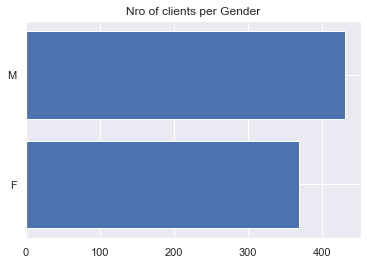

-----------------------------------------------------------------------------------------------------------------------------
Graphic nr 2


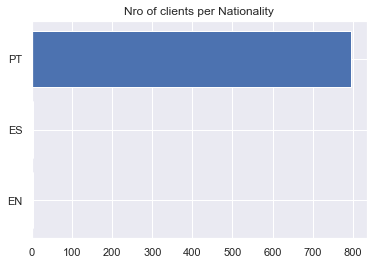

-----------------------------------------------------------------------------------------------------------------------------
Graphic nr 3


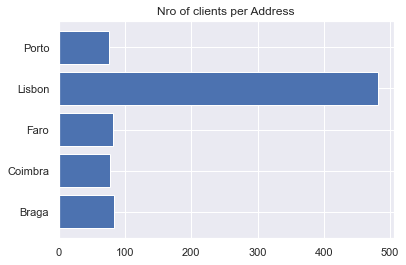

-----------------------------------------------------------------------------------------------------------------------------
Graphic nr 4.1


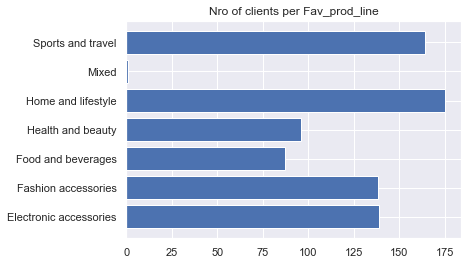

-----------------------------------------------------------------------------------------------------------------------------
Graphic nr 4.2


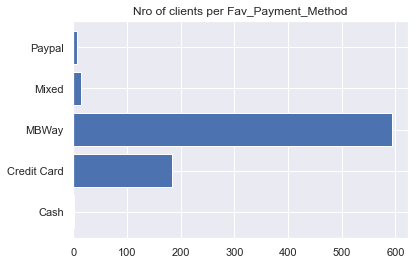

-----------------------------------------------------------------------------------------------------------------------------
Graphic nr 4.3


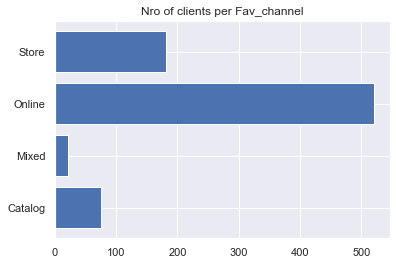

-----------------------------------------------------------------------------------------------------------------------------


In [52]:
for i in ['Age']: 
    for ii, index in zip(['Gender','Nationality','Address','Fav_prod_line','Fav_Payment_Method','Fav_channel'], [1,2,3,4.1,4.2,4.3]):
        print(f'Graphic nr {index}')
        plt.figure()
        plt.barh(width= (signature.groupby(ii).count()[i].values), 
                 y=(signature.groupby(ii).count()[i].index))
        plt.title(f'Nro of clients per {ii}')
        plt.show()
        print('-'*125)

In [ ]:
# signature.to_csv(r'signature_table_R20181128.csv')